# Transfer learning
##### Transfer learning, used in machine learning, is the reuse of a pre-trained model on a new problem. In transfer learning, a machine exploits the knowledge gained from a previous task to improve generalization about another. For example, in training a classifier to predict whether an image contains food, you could use the knowledge it gained during training to recognize drinks.
##### With transfer learning, we basically try to exploit what has been learned in one task to improve generalization in another. We transfer the weights that a network has learned at “task A” to a new “task B.”"

##### Transfer learning is mostly used in computer vision and natural language processing tasks like sentiment analysis due to the huge amount of computational power required.

### How Transfer Learning Works?
- In computer vision, for example, neural networks usually try to detect edges in the earlier layers, shapes in the middle layer and some task-specific features in the later layers. In transfer learning, the early and middle layers are used and we only retrain the latter layers. It helps leverage the labeled data of the task it was initially trained on.

- Let’s go back to the example of a model trained for recognizing a backpack on an image, which will be used to identify sunglasses. In the earlier layers, the model has learned to recognize objects, because of that we will only retrain the latter layers so it will learn what separates sunglasses from other objects.

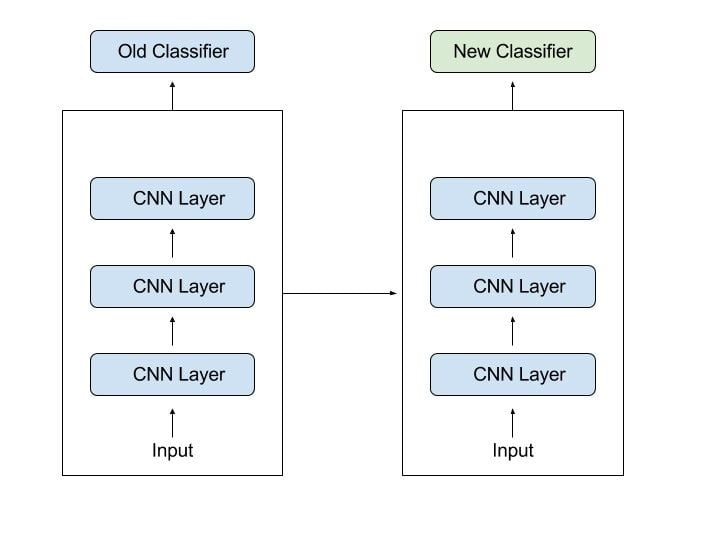

##### In transfer learning, we try to transfer as much knowledge as possible from the previous task the model was trained on to the new task at hand. This knowledge can be in various forms depending on the problem and the data. For example, it could be how models are composed, which allows us to more easily identify novel objects.


### When to Use Transfer Learning?
    There isn’t enough labeled training data to train your network from scratch.
    There already exists a network that is pre-trained on a similar task, which is usually trained on massive amounts of data.
    When task 1 and task 2 have the same input.


### Approaches to Transfer Learning

#### 1. Training a Model to Reuse it
- Imagine you want to solve task A but don’t have enough data to train a deep neural network. One way around this is to find a related task B with an abundance of data. Train the deep neural network on task B and use the model as a starting point for solving task A. Whether you'll need to use the whole model or only a few layers depends heavily on the problem you're trying to solve.
#### 2. Using a Pre-Trained Model
- The second approach is to use an already pre-trained model. There are a lot of these models out there, so make sure to do a little research. How many layers to reuse and how many to retrain depends on the problem. 
#### 3. Feature Extraction
- Another approach is to use deep learning to discover the best representation of your problem, which means finding the most important features. This approach is also known as representation learning, and can often result in a much better performance than can be obtained with hand-designed representation.

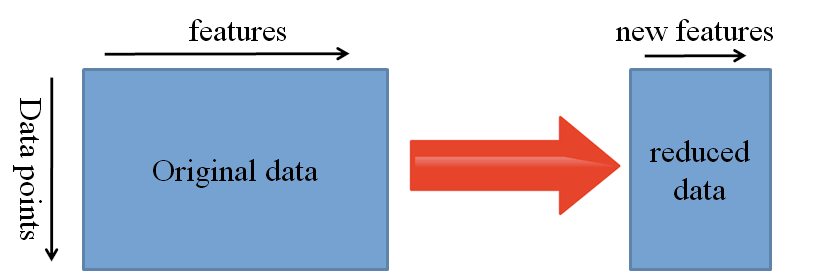


## Let's dive into code

## Transfer learning in image classification

### In this notebook I will use transfer learning and take pre-trained model from google's Tensorflow called `ResNet-50`. Using pre-trained model saves lot of time and computational budget for new classification problem at hand.



In [46]:
# Libraries

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## Preparing The Data



In [47]:

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" # url of different types of flower provided by tensorflow
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True) # fetching the dataset and storing it into flower_photos folder
data_dir = pathlib.Path(data_dir)

In [48]:
print(data_dir)
""

/home/jagannath/.keras/datasets/flower_photos


''

/home/jagannath/.keras/datasets/flower_photos/roses/12240303_80d87f77a3_n.jpg


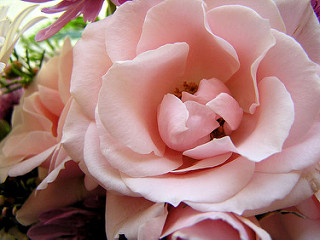

In [49]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

### Spliting dataset into training and testing.

In [50]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [51]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [52]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### column that our dataset contains

2024-06-12 21:56:28.103183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


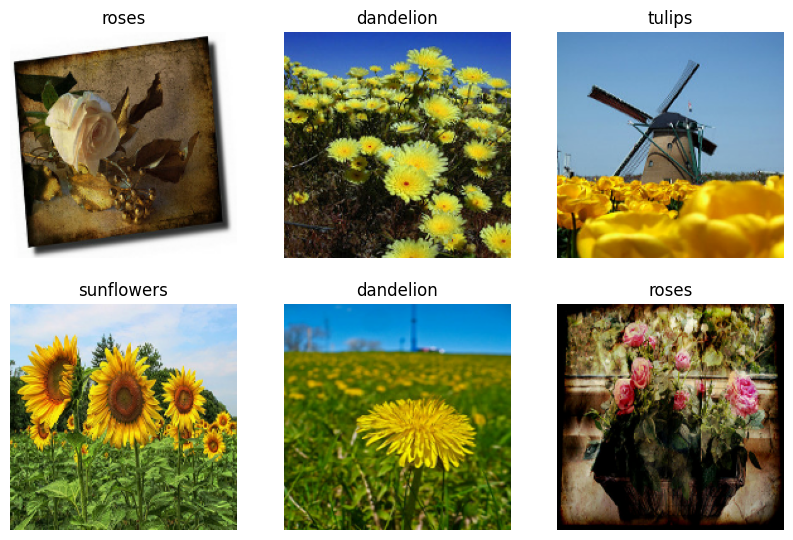

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [ ]:
resnet_model = Sequential() # initalizing empty model

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
# Pretrained model are not trainable
for layer in pretrained_model.layers:
        layer.trainable=False

# adding model, faltten, dense layer into previously trained model
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))
     

In [ ]:
resnet_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions


In [ ]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [ ]:

pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[4.62471    0.299852   1.0893542  ... 0.06063224 0.43124914 0.39066234]]


In [ ]:

output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)